In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
%matplotlib inline
import calendar


In [2]:
dset=pd.read_csv('Dataset.csv')

In [3]:
dset.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [4]:
dset.size

4675

In [5]:
dset.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

There are no null values but we need to do some clean up:

In [6]:
del dset['Unnamed: 0']

In [7]:
dset.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [8]:
dset.rename(columns={'Data': 'Date', 'Genre': 'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)

In [9]:
dset.Date.max()

'2017-07-09 00:00:00'

In [10]:
dset.Date.min()

'2016-01-01 00:00:00'

In [11]:
dset['Date'] = pd.to_datetime(dset['Date'])

In [12]:
month_order={
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}

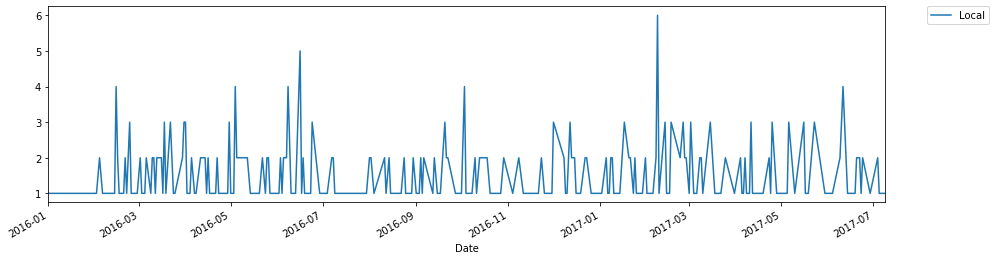

In [13]:
dset.groupby('Date').count()['Local'].plot(figsize=(15,4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [14]:
def month_n(a):
    b=calendar.month_name[a]
    return b

In [15]:
x=[]
for i in range (0, len(dset.Date)):
                x.append(month_n(dset.Date.loc[i].month))

In [16]:
y=[]
for i in range (0, len(dset.Date)):
                y.append(dset.Date.loc[i].year)

In [17]:
dset['month']=x
dset['year']=y

In [18]:
dset.head(3)

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,month,year
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,January,2016
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,January,2016
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,January,2016


In [19]:
dset_trend=dset.pivot_table(index='month', columns=[ 'year','Accident Level'], aggfunc='count')['Countries']


In [20]:
n=np.nan
dset_trend.replace(n,0,inplace=True)

In [21]:
dset_trend.head(2)

year            2016                      2017                    
Accident Level     I   II  III   IV    V     I   II  III   IV    V
month                                                             
April           24.0  1.0  3.0  1.0  0.0  20.0  1.0  0.0  2.0  0.0
August          15.0  3.0  2.0  1.0  0.0   0.0  0.0  0.0  0.0  0.0

In [22]:
dset_trend[2016]

Accident Level,I,II,III,IV,V
month,,,,,
April,24.0,1.0,3.0,1.0,0.0
August,15.0,3.0,2.0,1.0,0.0
December,18.0,2.0,3.0,1.0,0.0
February,23.0,4.0,2.0,1.0,1.0
January,11.0,0.0,0.0,1.0,0.0
July,11.0,1.0,4.0,2.0,1.0
June,26.0,1.0,0.0,3.0,1.0
March,24.0,4.0,3.0,3.0,0.0
May,23.0,2.0,0.0,1.0,0.0


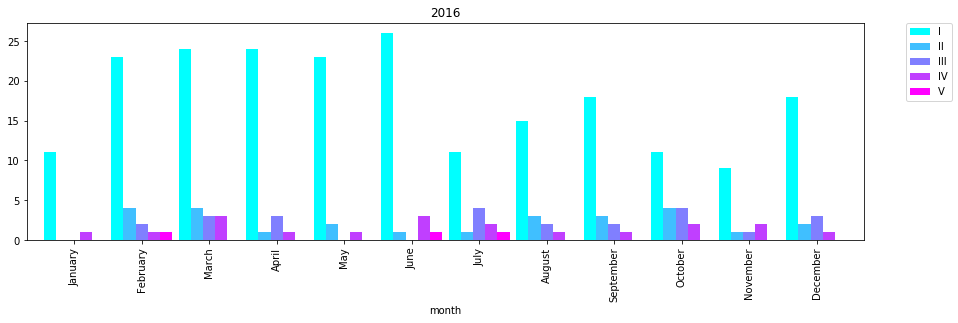

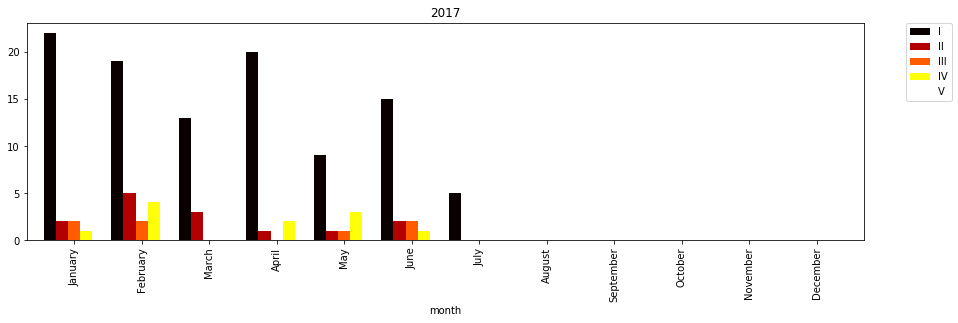

In [23]:
dset_trend[2016].loc[month_order].plot(kind='bar', figsize=(15,4), width=0.9, cmap='cool', title='2016')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
dset_trend[2017].loc[month_order].plot(kind='bar', figsize=(15,4), width=0.9, cmap='hot', title='2017')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [24]:
order={'I':1, 'II':2, 'III':3, 'IV':4, 'V':5}

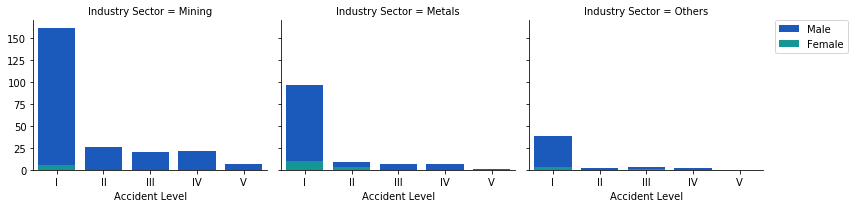

In [25]:
fig=sns.FacetGrid(dset,aspect=1.2,palette="winter", hue='Gender',col='Industry Sector', legend_out=True)
fig.map(sns.countplot, 'Accident Level', order=order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


No handles with labels found to put in legend.


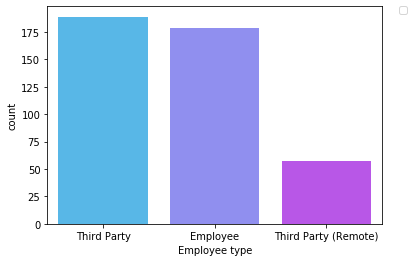

In [26]:
sns.countplot('Employee type',data=dset,palette='cool' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [27]:
dset['Potential Accident Level'].unique()

array(['IV', 'III', 'I', 'II', 'V', 'VI'], dtype=object)

In [28]:
order2={'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}

In [29]:
q=Series()
for i in range(0, len(dset)):
    q=q.append(Series(order2[dset.loc[i]['Accident Level']]*order2[dset.loc[i]['Potential Accident Level']]), ignore_index=True)

In [30]:
dset['Accident Impact']=q

In [31]:
dset.head(5)

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,month,year,Accident Impact
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,January,2016,4
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,January,2016,4
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,January,2016,3
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,January,2016,1
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,January,2016,16


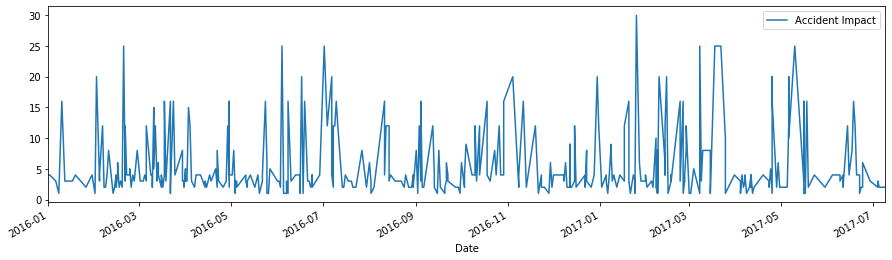

In [32]:
dset.plot(x='Date', y='Accident Impact', figsize=(15,4), kind='line')

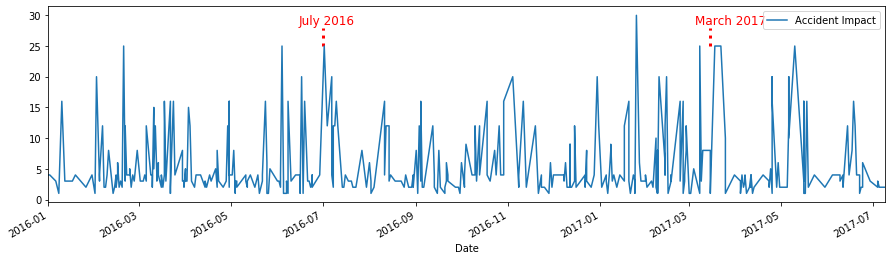

In [33]:
dset.plot(x='Date', y='Accident Impact', figsize=(15,4), kind='line')
plt.text(x='2016-6-15', y=28.5, s='July 2016', color='red', fontsize=12)
plt.vlines(x='2016-7-1', ymin=25, ymax=28, color='red', linestyles=':', linewidth=3)
plt.text(x='2017-3-5', y=28.5, s='March 2017', color='red', fontsize=12)
plt.vlines(x='2017-3-15', ymin=25, ymax=28, color='red', linestyles=':', linewidth=3)


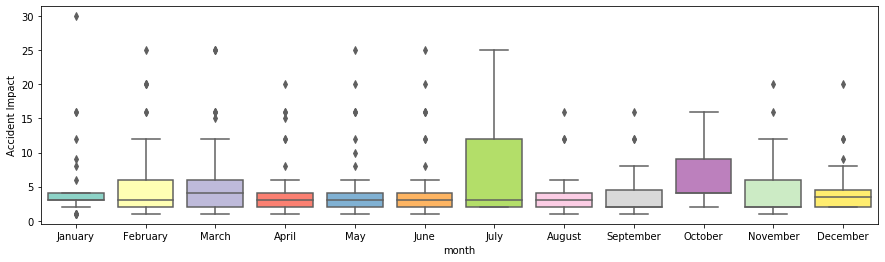

In [34]:
plt.figure(figsize=(15,4))
sns.boxplot(x='month', y='Accident Impact', data=dset, palette='Set3', saturation=1)


In [35]:
wd=[]
for i in range(len(dset)):
    wd.append(dset['Date'].loc[i].weekday())

In [36]:
weekday={'0':'Monday',
        '1':'Tuesday', 
        '2':'Wednesday',
        '3':'Thursday',
        '4':'Friday',
        '5':'Saturday',
        '6':'Sunday'}

In [37]:
wd_order={'Monday':1,
        'Tuesday':2, 
        'Wednesday':3,
        'Thursday':4,
        'Friday':5,
        'Saturday':6,
        'Sunday':7}

In [38]:
wwd=[]
for i in wd:
    wwd.append(weekday[str(i)])

In [39]:
dset['weekday']=wwd

In [40]:
week_d=dset.pivot_table(index='weekday', columns='Industry Sector', aggfunc='count')['Accident Level']

Text(0, 0.5, 'number of Accident')

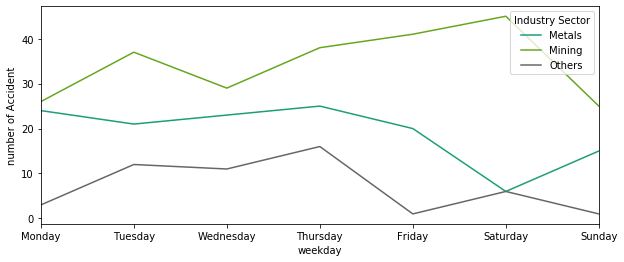

In [41]:
week_d.loc[wd_order].plot(figsize=(10,4), xticks=range(7), cmap='Dark2', kind='line')
plt.ylabel('number of Accident')

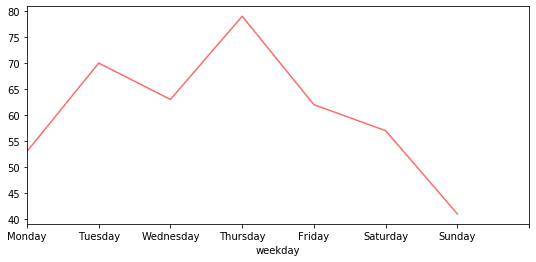

In [42]:
dset.groupby('weekday').count()['month'].loc[wd_order].plot(kind='line', figsize=(9,4), xticks=range(0,8), color='#FF6A6A')

D:\WisenProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\WisenProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


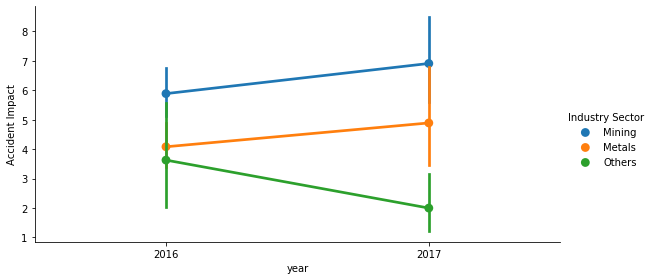

In [43]:
sns.factorplot(x='year', y='Accident Impact', data=dset, hue='Industry Sector', aspect=2, size=4)

In [44]:
dset_ind=dset.groupby('Industry Sector').count()['Date']

In [45]:
dset_ind_imp=dset.groupby('Industry Sector')['Accident Impact'].mean()

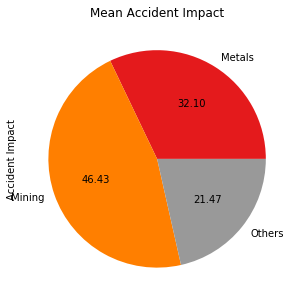

In [46]:
dset_ind_imp.plot(kind='pie', figsize=(5,5), cmap='Set1', autopct='%.2f', title='Mean Accident Impact')


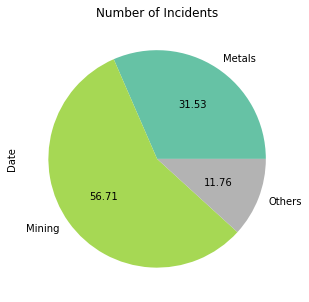

In [47]:
dset_ind.plot(kind='pie', figsize=(5,5), cmap='Set2', autopct='%.2f', title='Number of Incidents')

In [48]:
dset_cr=dset.pivot_table(index='Critical Risk', columns='Accident Level', aggfunc='count')['month']
dset_cr.replace(n, 0, inplace=True)
dset_cr['total']=dset_cr.sum(axis=1)

In [49]:
dset_cr.style.background_gradient(cmap='Blues')

Accident Level,I,II,III,IV,V,total
Critical Risk,,,,,,
Not applicable,0,0,0,1,0,1
Bees,10,0,0,0,0,10
Blocking and isolation of energies,3,0,0,0,0,3
Burn,0,0,1,0,0,1
Chemical substances,15,2,0,0,0,17
Confined space,1,0,0,0,0,1
Cut,11,2,1,0,0,14
Electrical Shock,2,0,0,0,0,2
Electrical installation,0,0,0,1,0,1


In [50]:
dset_cr.drop('Others', axis=0, inplace=True)

Text(0.5, 0, 'total number of Accidents')

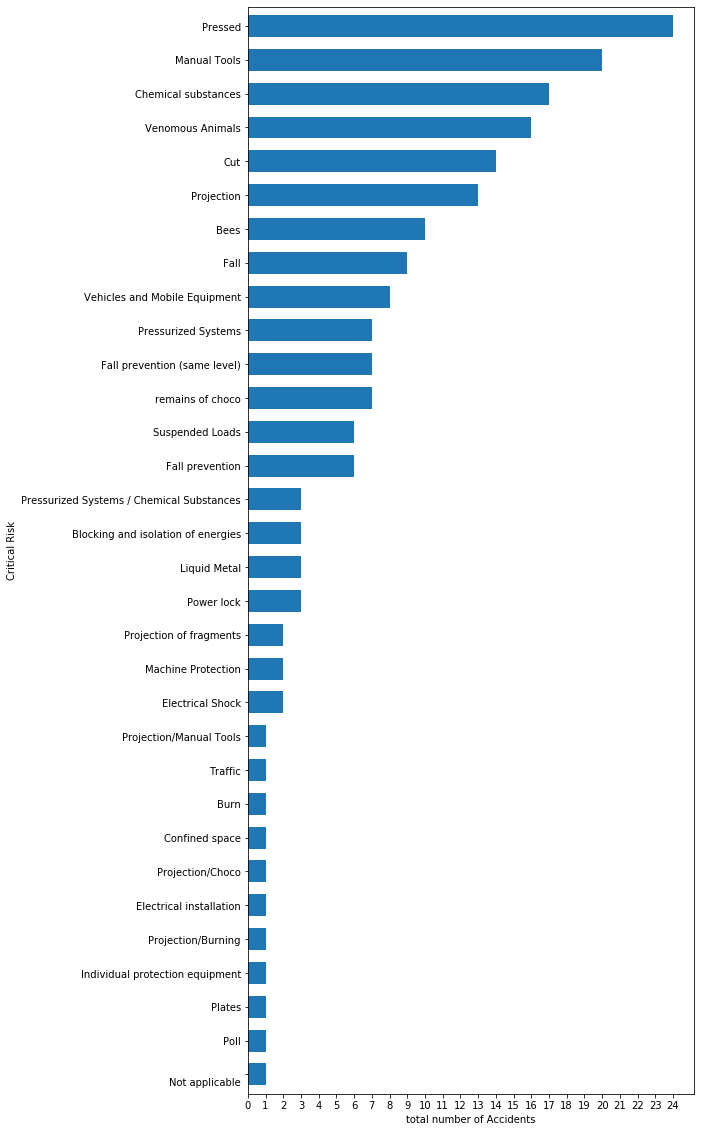

In [51]:
dset_cr.total.sort_values().plot(kind='barh', figsize=(8,20), xticks=range(0,25), grid=False, width=0.65)
plt.xlabel('total number of Accidents')


In [52]:
dset_cr.nlargest(6, 'total').style.background_gradient(cmap='winter')

Accident Level,I,II,III,IV,V,total
Critical Risk,,,,,,
Pressed,17,1,2,4,0,24
Manual Tools,12,5,3,0,0,20
Chemical substances,15,2,0,0,0,17
Venomous Animals,16,0,0,0,0,16
Cut,11,2,1,0,0,14
Projection,10,2,0,1,0,13


In [53]:
dset_ind_risk=dset.pivot_table(index='Critical Risk', columns='Industry Sector', aggfunc='count')['Accident Level']
dset_ind_risk.drop('Others', axis=0, inplace=True)
dset_ind_risk.replace(n, 0, inplace=True)
dset_ind_risk['total']=dset_ind_risk.sum(axis=1)
dset_ind_risk

Industry Sector,Metals,Mining,Others,total
Critical Risk,,,,
\nNot applicable,1.0,0.0,0.0,1.0
Bees,0.0,0.0,10.0,10.0
Blocking and isolation of energies,3.0,0.0,0.0,3.0
Burn,1.0,0.0,0.0,1.0
Chemical substances,15.0,2.0,0.0,17.0
Confined space,1.0,0.0,0.0,1.0
Cut,10.0,4.0,0.0,14.0
Electrical Shock,0.0,2.0,0.0,2.0
Electrical installation,0.0,1.0,0.0,1.0


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

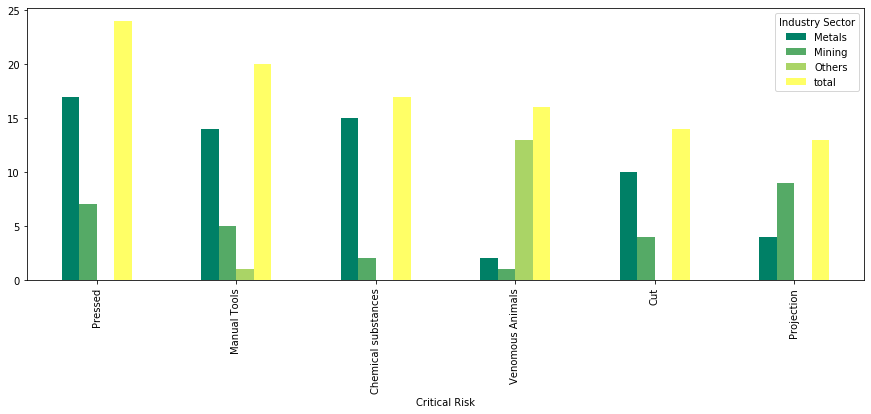

In [54]:
dset_ind_risk.nlargest(6,'total').plot(kind='bar', xticks=range(30), figsize=(15,5), cmap='summer')
plt.xticks(rotation=90)

In [55]:
dset_ind_risk_nt=dset_ind_risk.drop('total', axis=1)

Text(30, 14, 'V')

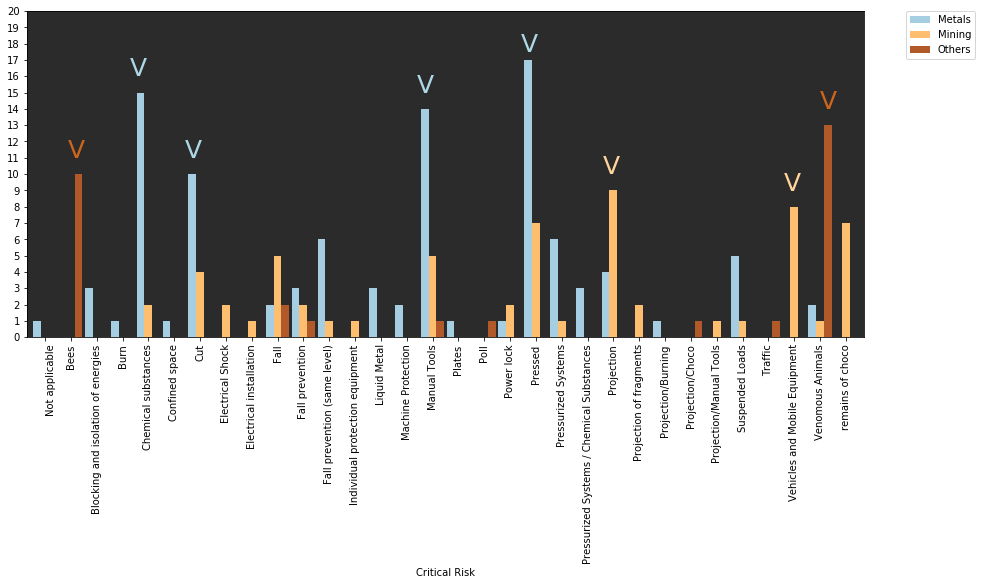

In [56]:
fig=dset_ind_risk_nt.plot(kind='bar', xticks=range(30),yticks=range(0,21), figsize=(15,6), cmap='Paired', width=0.9)
fig.set_facecolor('#2B2B2B')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.text(x=0.9, y=11, s='V', color='#CD661D', fontsize=25)
plt.text(x=3.3, y=16, s='V', color='#ADD8E6', fontsize=25)
plt.text(x=5.4, y=11, s='V', color='#ADD8E6', fontsize=25)
plt.text(x=14.4, y=15, s='V', color='#ADD8E6', fontsize=25)
plt.text(x=18.4, y=17.5, s='V', color='#ADD8E6', fontsize=25)
plt.text(x=21.6, y=10, s='V', color='#FFD39B', fontsize=25)
plt.text(x=28.6, y=9, s='V', color='#FFD39B', fontsize=25)
plt.text(x=30, y=14, s='V', color='#CD661D', fontsize=25)

In [57]:
dset_risk_other=dset.loc[dset['Critical Risk']=='Others']

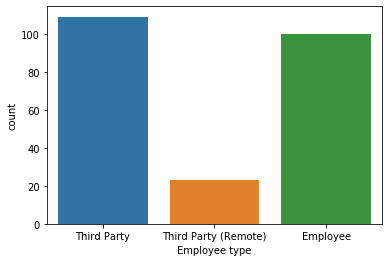

In [58]:
sns.countplot('Employee type', data=dset_risk_other)

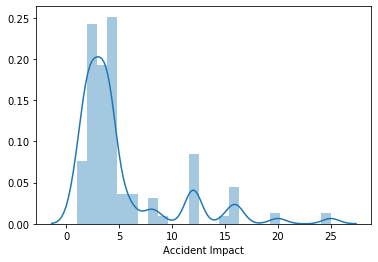

In [59]:
sns.distplot(dset_risk_other['Accident Impact'])